In [4]:
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
data = pd.read_csv("Final data.csv", encoding='latin1')

<ipython-input-5-95865ba14f06>:1: DtypeWarning: Columns (4,7,8,9,10,11,12,13,14,19,29,30,31,34,37,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,94,96,97,98,99,106,107,108,109,110,111,118,119,120,121,122,123,130,131,132,133,134,135,142,143,144,145,146,147,154,156,157,158,159,166,168,169,170,171,178,180,181,182,183) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Final data.csv", encoding='latin1')


In [6]:
data.describe()

,BindingDB Reactant_set_id,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 95,Unnamed: 100,Unnamed: 101,...,Unnamed: 164,Unnamed: 165,Unnamed: 167,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 179
count,3.545700e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3.070229e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.451062e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.791000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.956160e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.028756e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.085152e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.152983e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(35457, 184)

In [7]:
columns_to_keep = ["Ligand SMILES", "Ligand InChI", "Target Name",	"Ki (nM)", "IC50 (nM)", "Kd (nM)", "EC50 (nM)", "kon (M-1-s-1)", "koff (s-1)", "pH"]
data = data[columns_to_keep]
data.describe()

,Ligand SMILES,Ligand InChI,Target Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH
count,35457,34702,35457,3892,26458,1840,3695,274,275,2181.0
unique,21428,20709,125,1270,4945,385,1168,54,13,15.0
top,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc34)[C@@H]1CC...,InChI=1S/C18H24O2/c1-18-9-8-14-13-5-3-12(19)10...,Androgen receptor,Homo sapiens,<100,>10000,>10000,Fibroblast growth factor receptor 2,Homo sapiens,7.5
freq,129,129,6655,139,2176,457,406,119,119,1074.0


In [8]:
columns_to_keep = ["Ligand SMILES", "Ligand InChI", "Target Name",	"Ki (nM)", "IC50 (nM)", "Kd (nM)", "EC50 (nM)"]
data = data[columns_to_keep]

In [9]:
data.shape

(35457, 7)

In [10]:
data.to_csv('modified_dataset.csv', index=False)

In [11]:
data = pd.read_csv("new dataset.csv", encoding='latin1')

In [12]:
data['IC50 (nM)'] = pd.to_numeric(data['IC50 (nM)'], errors='coerce')
if 'IC50 (nM)' not in data.columns:
    raise ValueError("IC50 column is missing in the dataset.")

# Define constants or load Km and substrate concentration
Km = 1.0  # Example value, replace with actual Km if available
substrate_concentration = 0.1  # Example [S], replace as neededdata = pd.read_csv("new dataset.csv", encoding='latin1')

# Convert columns to numeric, coercing errors
for col in ['IC50 (nM)', 'Kd (nM)', 'EC50 (nM)']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Function to calculate Ki
def calculate_ki(row, Km, substrate_concentration):
    if pd.notnull(row['IC50 (nM)']):
        # Calculate Ki from IC50
        return row['IC50 (nM)'] / (1 + (substrate_concentration / Km))
    elif pd.notnull(row['Kd (nM)']):
        # Approximate Ki as Kd
        return row['Kd (nM)']
    elif pd.notnull(row['EC50 (nM)']):
        # Calculate Ki from EC50
        return row['EC50 (nM)'] / (1 + (substrate_concentration / Km))
    else:
        # Missing Ki, will be imputed later
        return np.nan
# Apply function to calculate Ki
data['Ki (nM)'] = data.apply(lambda row: calculate_ki(row, Km, substrate_concentration), axis=1)

# Impute missing Ki values with the median
median_ki = data['Ki (nM)'].median()
data['Ki (nM)'] = data['Ki (nM)'].fillna(median_ki)



# Save updated dataset
data.to_csv('updated_compound_data.csv', index=False)

In [ ]:
'''
data['IC50 (nM)'] = pd.to_numeric(data['IC50 (nM)'], errors='coerce')
if 'IC50 (nM)' not in data.columns:
    raise ValueError("IC50 column is missing in the dataset.")

# Define constants or load Km and substrate concentration
Km = 1.0  # Example value, replace with actual Km if available
substrate_concentration = 0.1  # Example [S], replace as needed

# Calculate Ki
def calculate_ki(row, Km, substrate_concentration):
    if pd.notnull(row['IC50 (nM)']):
        if pd.notnull(Km) and pd.notnull(substrate_concentration):
            return row['IC50 (nM)'] / (1 + (substrate_concentration / Km))
        else:
            return row['IC50 (nM)']  # Simplified approximation
    else:
        return np.nan  # Mark missing values

data['Ki (nM)'] = data.apply(lambda row: calculate_ki(row, Km, substrate_concentration), axis=1)

# Handle missing Ki values (if needed)
data['Ki (nM)'] = data['Ki (nM)'].fillna(data['Ki (nM)'].median())  # Example: Median imputation

# Save updated dataset
data.to_csv('updated_compound_data.csv', index=False)
'''

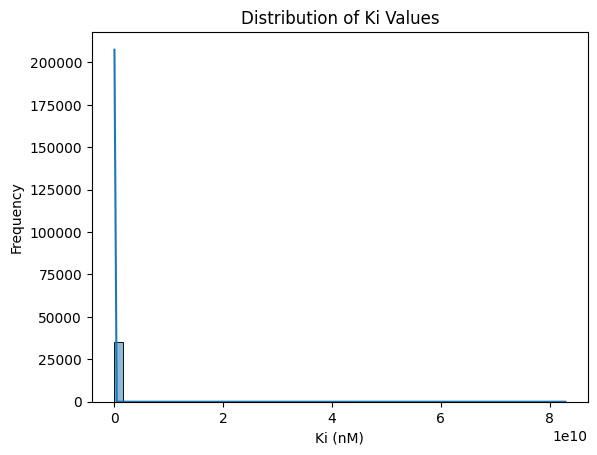

In [13]:
data = pd.read_csv("updated_compound_data.csv")
sns.histplot(data['Ki (nM)'], bins=50, kde=True)
plt.xlabel("Ki (nM)")
plt.ylabel("Frequency")
plt.title("Distribution of Ki Values")
plt.show()

In [23]:
threshold = 1000  # Example threshold in nM
data['Activity'] = data['Ki (nM)'].apply(lambda x: 1 if x <= threshold else 0)
data.to_csv('Final_data_with_labels.csv', index=False)

In [24]:
# Count the number of instances in each class
class_counts = data['Activity'].value_counts()
# Print the counts
print("Number of instances in each class:")
print(class_counts)

Number of instances in each class:
Activity
1    28478
0     6728
Name: count, dtype: int64
